<a href="https://colab.research.google.com/github/FelipeToroR/Keras_Desafio1/blob/main/handwritten_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!git clone https://github.com/OptativoPUCV/Handwritten-letter-dataset

In [3]:
!mkdir Datos-letras

In [ ]:
!7z x "/content/Handwritten-letter-dataset/A_Z Handwritten Data.7z.001" -tsplit
!7z e "/content/A_Z Handwritten Data.7z"

In [5]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [6]:
X = data.drop('0',axis = 1)  # x serán los datos de ENTRADA
y = data['0']    # y representa el label o letra de SALIDA

In [7]:
# se divide el dataset en 70% 'train' y 30% 'test'
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(260715, 784)
(111735, 784)
(111735,)


# Remodelando los datos
Se utiliza la libreria numpy para transformar nuestros datos y poder trabajar con ellos. Originalmente en el archivo CSV los datos estan en un arreglo de largo 784, pero ahora se convertiran en una imagen de 28x28 pixeles.

El formato de los datos de entrenamiento es:  (260715, 784)
El formato de los datos de prueba es (111735, 784)


In [8]:
shuffle_data = shuffle(x_train)

## **Se comprueba que los datos se pueden visualizar como imagen**

## **Se transforma la imagen 2d a un vector de largo 784 + su etiqueta**

#**Normalizando valores de entrada entre 0 e 1.** 
Simplemente se divide en 255 y se obtienen valores que simbolizan 0 para las celdas completamente negras y 1 para las completamente blancas

In [9]:
x_training = x_train.astype('float32')
x_training /= 255

x_testing = x_test.astype('float32')
x_testing /= 255


# **Normalizando valores de salida**
La salida sera un vector con 26 dimensiones, ya que existen 26 clases en el alfabeto inglés (A-Z)

In [10]:
num_classes = 26

y_training = to_categorical(y_train, num_classes)
y_testing = to_categorical(y_test, num_classes)


## **Creación del modelo**
Consiste en 784 neuronas de entradas, 2 capas ocultas (de 160 y 10) y la capa de salida consta de las 26 clases de letras.

In [ ]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

modelo = Sequential()
modelo.add(Dense(208, input_shape=(784,), activation="relu"))
modelo.add(Dense(104, activation="relu"))
modelo.add(Dense(52, activation="relu"))
modelo.add(Dense(26, activation="softmax"))


modelo.summary()

In [12]:
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
history = modelo.fit(x_training, y_training, validation_data=(x_testing, y_testing), batch_size=32, epochs=50, verbose=2)

Epoch 1/50
8148/8148 - 42s - loss: 0.2503 - accuracy: 0.9288 - val_loss: 0.1468 - val_accuracy: 0.9577 - 42s/epoch - 5ms/step
Epoch 2/50
8148/8148 - 33s - loss: 0.1119 - accuracy: 0.9672 - val_loss: 0.1111 - val_accuracy: 0.9691 - 33s/epoch - 4ms/step
Epoch 3/50
8148/8148 - 36s - loss: 0.0867 - accuracy: 0.9742 - val_loss: 0.0938 - val_accuracy: 0.9732 - 36s/epoch - 4ms/step
Epoch 4/50
8148/8148 - 31s - loss: 0.0703 - accuracy: 0.9788 - val_loss: 0.0851 - val_accuracy: 0.9759 - 31s/epoch - 4ms/step
Epoch 5/50
8148/8148 - 39s - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0774 - val_accuracy: 0.9789 - 39s/epoch - 5ms/step
Epoch 6/50
8148/8148 - 31s - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0886 - val_accuracy: 0.9766 - 31s/epoch - 4ms/step
Epoch 7/50
8148/8148 - 31s - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0872 - val_accuracy: 0.9766 - 31s/epoch - 4ms/step
Epoch 8/50
8148/8148 - 30s - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0759 - val_accuracy: 0.9821 - 30s/epoch - 4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


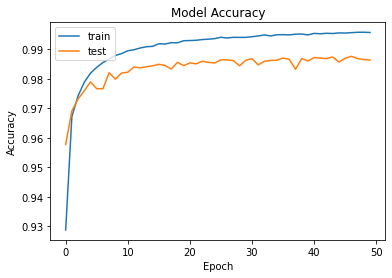

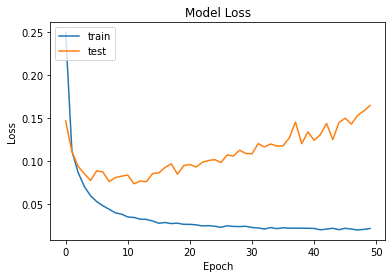

[INFO] test score - 0.16472959518432617
[INFO] test accuracy - 0.98630690574646


In [14]:
print(history.history.keys())

# evaluar el modelo
scores = modelo.evaluate(x_testing, y_testing, verbose=0)

# Mostrar precision 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Mostrar fallos
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))